In [20]:
from scipy.stats import f
import matplotlib.pyplot as plt
import numpy as np
import random

In [21]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2.2, 3.1, 4.1, 5, 5.8, 6.9, 7.8, 9, 10.2, 11.1]
S = 0.1


In [22]:
y_i = sum(y)
x_i = sum(x)

x_2 = sum([x_i**2 for x_i in x])
y_x_i = sum([x[i] * y[i] for i in range(len(x))])

n = len(x)

b0_t = (y_i * x_2 - y_x_i * x_i) / (n * x_2 - x_i * x_i)

b1_t = (y_i * x_i - y_x_i * n) / (x_i * x_i - n * x_2)

print("b0 = ", b0_t, "\nb1 = ", b1_t)

x_avg = sum(x) / len(x)
y_avg = sum(y) / len(y)

s_x_2 = sum([(x_i - x_avg) ** 2 for x_i in x]) / n
s_y_2 = sum([(y_i - y_avg) ** 2 for y_i in y]) / n

r = b1_t * (s_x_2 ** 0.5 / s_y_2 ** 0.5)

print(r, "коэф. корреляции")


b0 =  1.06 
b1 =  0.9927272727272727
0.9988235670852297 коэф. корреляции


In [23]:
def f1(b0, b1, x):
    return b0 + b1 * x

D1 = 0
temp_sum = 0

for i in range(len(x)):
    temp_sum += (y[i] - f1(b0_t, b1_t, x[i])) ** 2

D1 = (1 / (len(x) - 2)) * temp_sum

print(D1)

0.023954545454545468


In [24]:
p = 0.95
f_critical = f.ppf(p, n - 2, n - 1)
s_critical = D1 / S
print(s_critical, " ", f_critical)
if(s_critical > f_critical):
    print("Отличие значимо")
else:
    print("Отличие незначимо")

0.23954545454545467   3.2295826126867744
Отличие незначимо


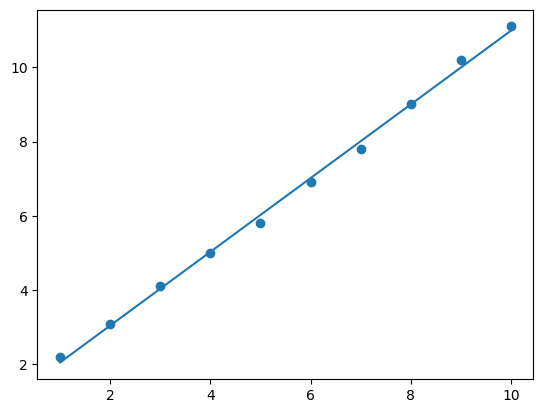

In [25]:
y_i_t = []
for x_i in x:
    y_i_t.append(f1(b0_t, b1_t, x_i))

plt.plot(x, y_i_t)
plt.scatter(x, y)
plt.show()

In [26]:
#добавить +- 20% к числам посмотреть на выборку потом

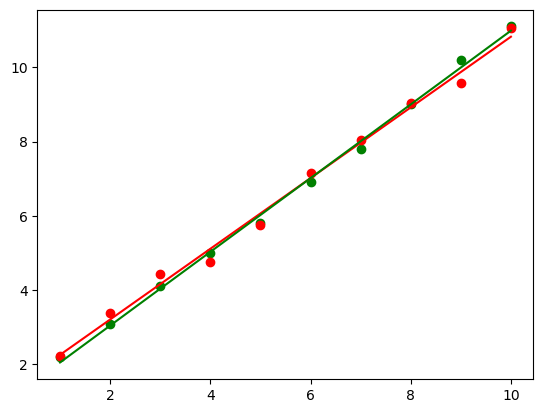

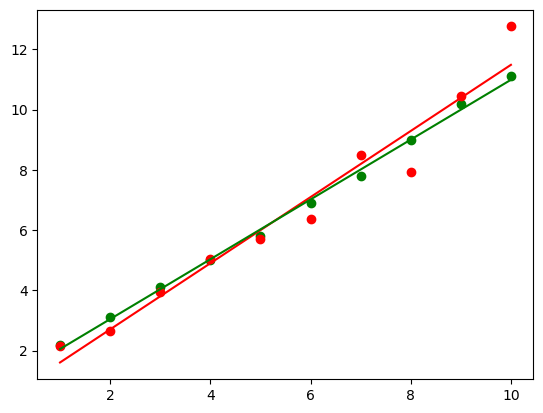

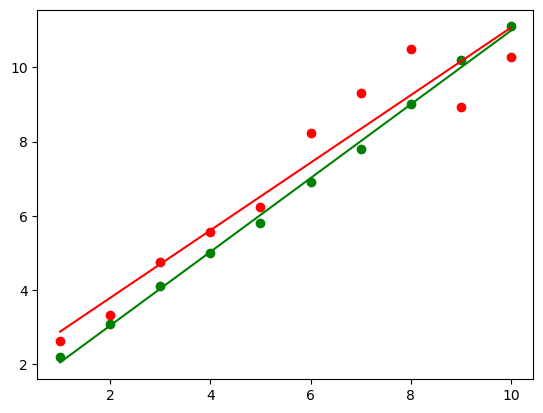

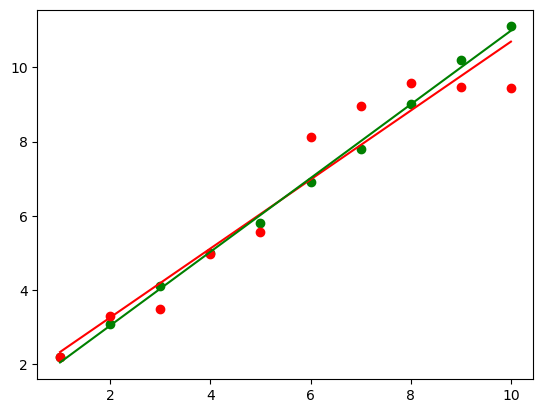

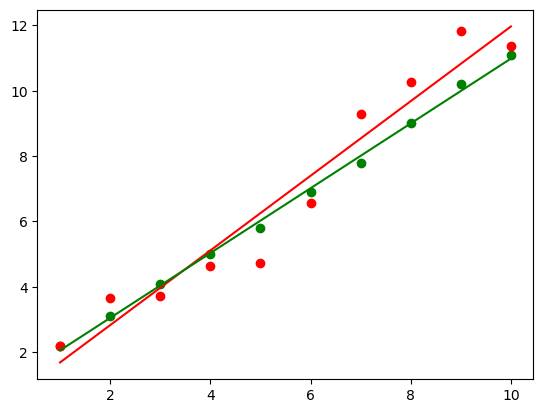

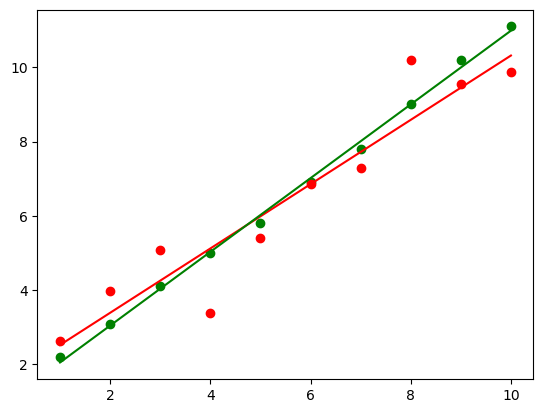

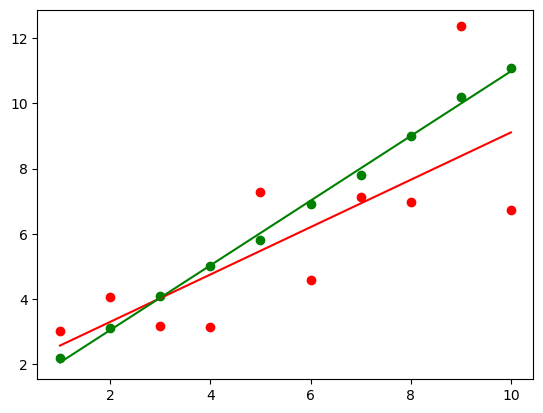

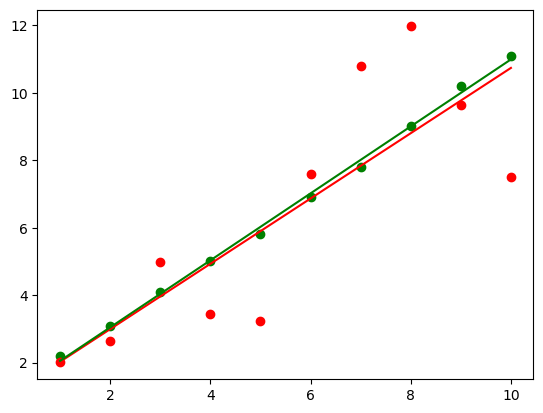

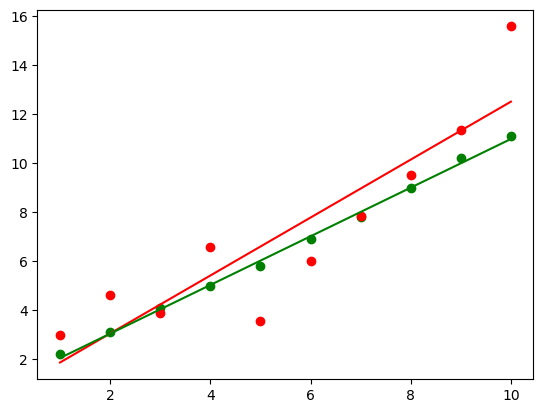

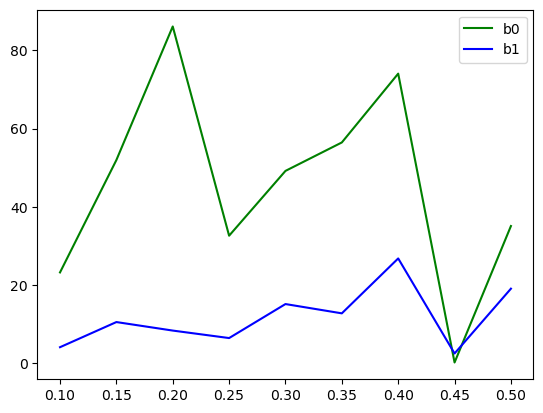

In [29]:
error = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
b0_error = []
b1_error = []

for e in error:

    y_percent = []
    y_copy = y.copy()

    for i in range(len(y)):
        y_percent.append(random.uniform(-e, e))
    
    for i in range(len(y_copy)):
        y_copy[i] = y_copy[i] * (1 + y_percent[i])


    y_i = sum(y_copy)
    
    x_i = sum(x)

    x_2 = sum([x_i**2 for x_i in x])
    y_x_i = sum([x[i] * y_copy[i] for i in range(len(x))])

    n = len(x)

    b0 = (y_i * x_2 - y_x_i * x_i) / (n * x_2 - x_i * x_i)

    b1 = (y_i * x_i - y_x_i * n) / (x_i * x_i - n * x_2)

    #print("b0 = ", b0, "\nb1 = ", b1)

    x_avg = sum(x) / len(x)
    y_avg = sum(y_copy) / len(y_copy)

    s_x_2 = sum([(x_i - x_avg) ** 2 for x_i in x]) / n
    s_y_2 = sum([(y_i - y_avg) ** 2 for y_i in y]) / n

    r = b1 * (s_x_2 ** 0.5 / s_y_2 ** 0.5)

    #print(r, "коэф. корреляции")

    def f2(b0, b1, x):
        return b0 + b1 * x

    D1 = 0
    temp_sum = 0

    for i in range(len(x)):
        temp_sum += (y_copy[i] - f2(b0, b1, x[i])) ** 2

    D1 = (1 / (len(x) - 2)) * temp_sum

    #print(D1)

    p = 0.95
    f_critical = f.ppf(p, n - 2, n - 1)
    s_critical = D1 / S
    #print(s_critical, " ", f_critical)
    # if(s_critical > f_critical):
    #     print("Отличие значимо")
    # else:
    #     print("Отличие незначимо")


    y_i_i = []
    for x_i in x:
        y_i_i.append(f2(b0, b1, x_i))

    plt.plot(x, y_i_i, color="red")
    plt.plot(x, y_i_t, color="green")
    plt.plot()
    plt.scatter(x, y, color="green")
    plt.scatter(x, y_copy, color="red")
    plt.show()

    b0_error.append(((abs(b0 - b0_t)) / (b0_t)) * 100)
    b1_error.append(((abs(b1 - b1_t)) / (b1_t)) * 100)

    # plt.plot(x, y_i)
    # plt.scatter(x, y_copy)
    # plt.show()
plt.plot(error, b0_error, color="green")
plt.plot(error, b1_error, color="blue")
plt.legend(["b0", "b1"])
plt.show()

b0 =  1.375139509055126 
b1 =  0.49751261844251776
0.38258993347012893 коэф. корреляции
0.2854215180627815
2.854215180627815   3.2295826126867744
Отличие незначимо


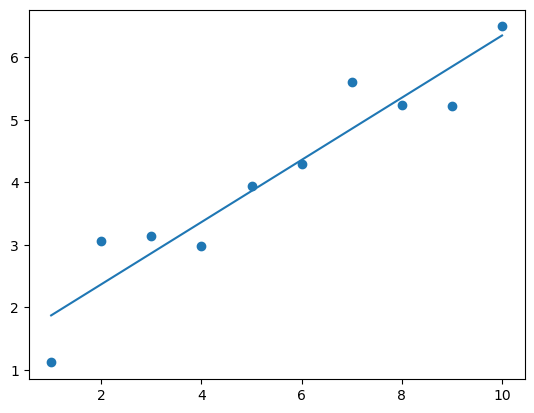

In [28]:
y_i = sum(y_copy)
x_i = sum(x)

x_2 = sum([x_i**2 for x_i in x])
y_x_i = sum([x[i] * y_copy[i] for i in range(len(x))])

n = len(x)

b0 = (y_i * x_2 - y_x_i * x_i) / (n * x_2 - x_i * x_i)

b1 = (y_i * x_i - y_x_i * n) / (x_i * x_i - n * x_2)

print("b0 = ", b0, "\nb1 = ", b1)

x_avg = sum(x) / len(x)
y_avg = sum(y_copy) / len(y_copy)

s_x_2 = sum([(x_i - x_avg) ** 2 for x_i in x]) / n
s_y_2 = sum([(y_i - y_avg) ** 2 for y_i in y]) / n

r = b1 * (s_x_2 ** 0.5 / s_y_2 ** 0.5)

print(r, "коэф. корреляции")

def f1(b0, b1, x):
    return b0 + b1 * x

D1 = 0
temp_sum = 0

for i in range(len(x)):
    temp_sum += (y_copy[i] - f1(b0, b1, x[i])) ** 2

D1 = (1 / (len(x) - 2)) * temp_sum

print(D1)

p = 0.95
f_critical = f.ppf(p, n - 2, n - 1)
s_critical = D1 / S
print(s_critical, " ", f_critical)
if(s_critical > f_critical):
    print("Отличие значимо")
else:
    print("Отличие незначимо")

    
y_i = []
for x_i in x:
    y_i.append(f1(b0, b1, x_i))

plt.plot(x, y_i)
plt.scatter(x, y_copy)
plt.show()